# Custom ML model to detect Veg / Non-Veg Symbol from the Image.

The project started by collecting the dataset from e-commerce sites: 
-  https://www.jiomart.com/c/groceries/2
-  https://www.amazon.in/gp/browse.html?node=2454178031&ref_=nav_em_sbc_bhg_gourmet_all_0_2_13_13

> The dataset consisted of images of vegetables and non-vegetables, which were used to train a custom machine learning model for detecting veg/non-veg symbols from images<br>
> The model employed a convolutional neural network (CNN) with 2 hidden layers.<br>
>

# Libraries used for varous tasks such as image processing,deep learning and data augmentation

In [19]:
import os 
import numpy as np
from cv2 import cv2
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

# loading and displaying the images

The images are loaded to a specified path and it was displayed using 
>matplotlib.pyplot.imshow()

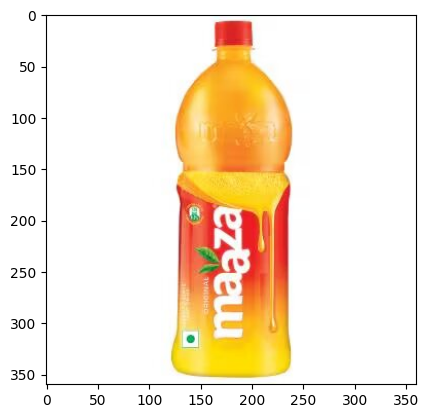

In [20]:
veg_image_path = r"C:\Users\MMb\Desktop\assg_1\dataset\training\Veg\veg8.jpg"
nonveg_image_path = r"C:\Users\MMb\Desktop\assg_1\dataset\training\Non-Veg\nv3.jpg"

veg_image = image.load_img(veg_image_path)
plt.imshow(veg_image)
plt.show()

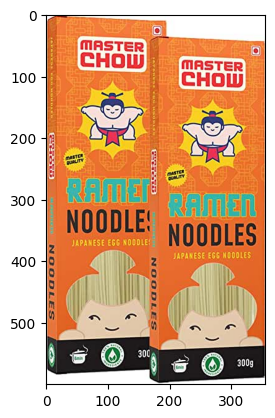

In [21]:
nonveg_image = image.load_img(nonveg_image_path)
plt.imshow(nonveg_image)
plt.show()

# 3D matrix representation of the images
>The images are read using the openCV <b>cv2.imread()</b> and it is stored as a 3D matrix

In [22]:
veg_matrix_3D = cv2.imread(veg_image_path)
print(veg_matrix_3D)
print(veg_matrix_3D.shape)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
(360, 360, 3)


# Setting up training and validation images
>This is done with the help of Data generator <br>

The image pixels are rescaled to a range of (0,1)
><b>flow_from_directory()</b> is used to create both training and validation images

In [23]:
train_data_dir = r'C:\Users\MMb\Desktop\assg_1\dataset\training/'
validation_data_dir = r'C:\Users\MMb\Desktop\assg_1\dataset\validation'

train_data_generator = ImageDataGenerator(rescale=1/255)
validation_data_generator = ImageDataGenerator(rescale=1/255)


In [24]:
train_dataset = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

validation_dataset = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)


Found 94 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [25]:
train_dataset.class_indices

{'Non-Veg': 0, 'Veg': 1}

In [26]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

# compiling the CNN model
A sequential model is defined using <b>tf.keras.models.Sequential</b>
>The model has convolutional layers,max pooling layers, flatten layers and dense layers

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(2, activation="sigmoid")
])

# Training the model
>The model is using Adam optimizers,binary_crossentropy loss function and accuracy as its evaluation metrics

In [32]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(train_dataset, epochs=20)

Epoch 1/20
32/32 [==============================] - 6s 198ms/step - loss: 0.0715 - acc: 0.9787
Epoch 2/20
32/32 [==============================] - 5s 164ms/step - loss: 0.0020 - acc: 1.0000
Epoch 3/20
32/32 [==============================] - 5s 160ms/step - loss: 0.0244 - acc: 0.9840
Epoch 4/20
32/32 [==============================] - 5s 169ms/step - loss: 0.0104 - acc: 1.0000
Epoch 5/20
32/32 [==============================] - 5s 168ms/step - loss: 4.9853e-04 - acc: 1.0000
Epoch 6/20
32/32 [==============================] - 6s 175ms/step - loss: 1.4585e-04 - acc: 1.0000
Epoch 7/20
32/32 [==============================] - 6s 178ms/step - loss: 5.7780e-05 - acc: 1.0000
Epoch 8/20
32/32 [==============================] - 5s 170ms/step - loss: 3.4175e-05 - acc: 1.0000
Epoch 9/20
32/32 [==============================] - 6s 177ms/step - loss: 2.5753e-05 - acc: 1.0000
Epoch 10/20
32/32 [==============================] - 6s 174ms/step - loss: 2.1478e-05 - acc: 1.0000
Epoch 11/20
32/32 [======

# Evaluating the model on the training dataset

In [33]:
model.evaluate(train_dataset)

32/32 [==============================] - 1s 43ms/step - loss: 3.1641e-06 - acc: 1.0000


[3.1640578158439623e-06, 1.0]

In [34]:
model.save("trained_model.h5")

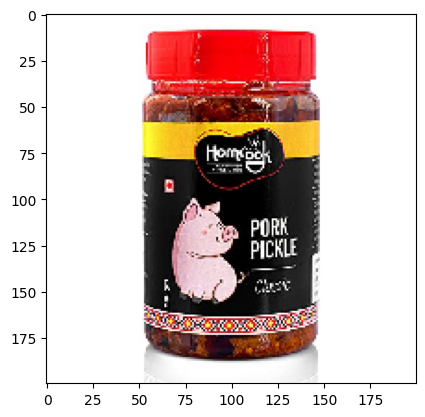

This is a Non-Veg Symbol


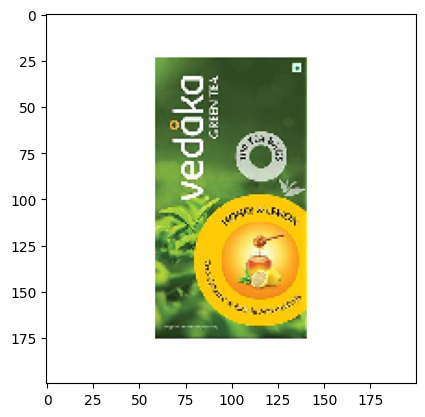

This is a Vegetable Symbol


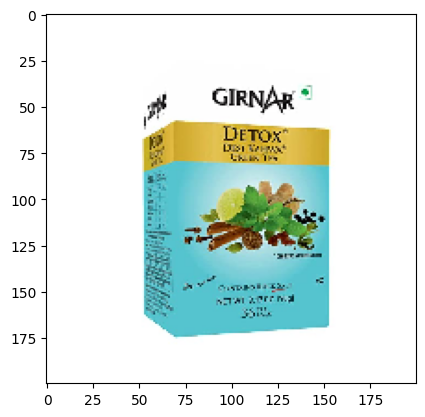

This is a Vegetable Symbol


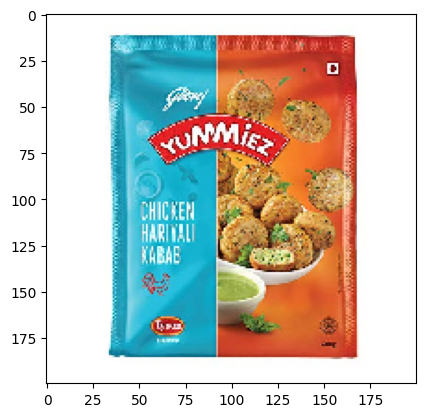

This is a Vegetable Symbol


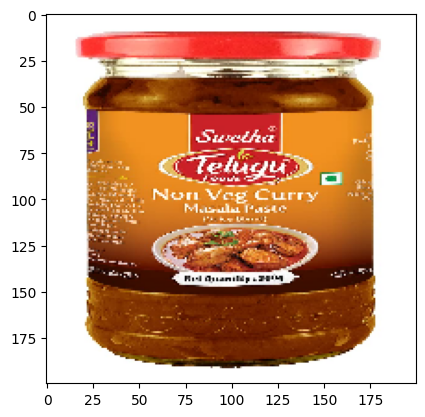

This is a Non-Veg Symbol


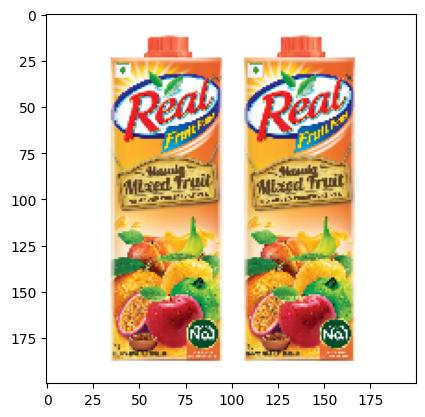

This is a Vegetable Symbol


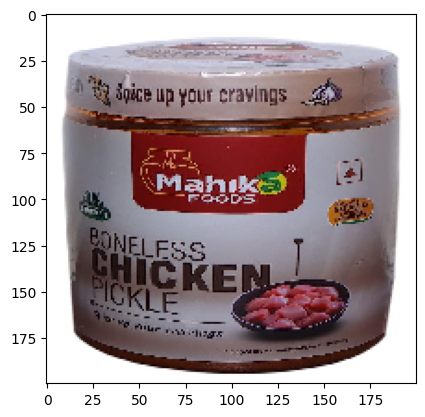

This is a Vegetable Symbol


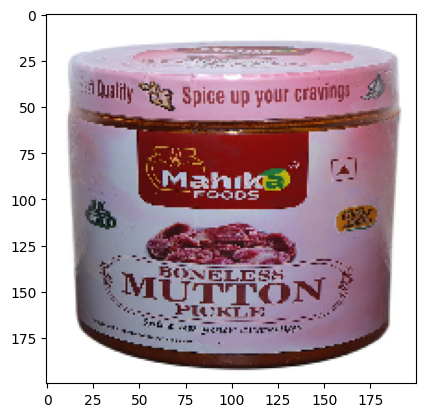

This is a Vegetable Symbol


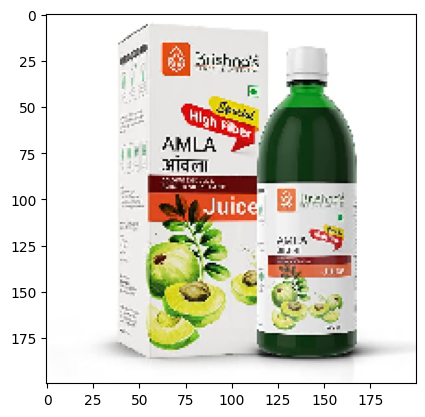

This is a Vegetable Symbol


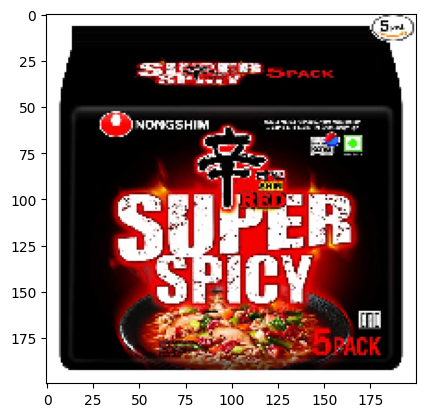

This is a Non-Veg Symbol


In [35]:
dirPath=r"C:\Users\MMb\Desktop\assg_1\dataset\testing"
for items in os.listdir(dirPath):
    item=image.load_img(dirPath+ '//' + items, target_size=(200,200))
    plt.imshow(item)
    plt.show()
    image_array = image.img_to_array(item)
    image_array = np.expand_dims(image_array, axis=0)

    # Predict the class of the image
    val = model.predict(image_array)

    # Check if any element in val is equal to 0
    if val.all() ==0:
        print("This is a Non-Veg Symbol")
    else:
        print("This is a Vegetable Symbol")